In [1]:
from pandas import Series, DataFrame
import pandas as pd
import nltk
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [50]:
train = pd.read_csv("..\..\Assignments\Assignment1\Train_rev1.csv")
#train[:3]

In [51]:
train_sample = train.sample(200000).reset_index() # Creates sample of 1000 job descriptions

# Part A (Basic Text Mining)

In [5]:
# Tokenize all job descriptions
train_sample['tokenized_strip'] = train_sample.apply(lambda row: row['FullDescription'].decode('utf-8').strip(),axis=1)
train_sample['tokenized'] = train_sample.apply(lambda row: nltk.word_tokenize(row['tokenized_strip']),axis=1)

In [6]:
# Get part of speech tags for each token in each description
train_sample['PoS'] = train_sample.apply(lambda row: nltk.pos_tag(row['tokenized']), axis=1)

## A1. Top 5 Parts of Speech in Corpus

In [7]:
# Create list of all tokens in corpus
all_tokens = []
for i in range(len(train_sample['tokenized'])):
    all_tokens = all_tokens + train_sample['tokenized'][i]

In [8]:
# Get part of speech tags for all tokens in corpus
all_PoS = nltk.pos_tag(all_tokens)

In [9]:
tokens, PoS = zip(*all_PoS) # Unzip all_PoS to separate list of tokens from list of parts of speech
PoS_freq = nltk.FreqDist(PoS) # Frequency of each part of speech
top5_PoS = PoS_freq.most_common()[:5] # 5 most frequent parts of speech in corpus
top5_PoS

[('NN', 45695), ('NNP', 35081), ('IN', 26039), ('JJ', 21797), ('DT', 20048)]

The 5 most common parts of speech in this corpus along with their respective frequencies are:
1. Noun, singular or mass: 46,389
2. Proper noun, singular: 33,742
3. Preposition or Subordinating Conjunction: 25,724
4. Adjective: 22,063
5. Determiner: 20,188

## A2. Zipf's Law, 100 Most Common Words

In [10]:
from nltk.tokenize import RegexpTokenizer
word_tokenizer = RegexpTokenizer(r'\w+')

# Get list of words without punctuation for each job description
train_sample['tokenized_words'] = train_sample.apply(lambda row: word_tokenizer.tokenize(row['tokenized_strip']),axis=1)

# Create list of words from all job descriptions
all_words = []
for i in range(len(train_sample['tokenized_words'])):
    all_words = all_words + train_sample['tokenized_words'][i]

# Make all words lowercase
words_lower = []
for word in all_words:
    words_lower.append(word.lower())

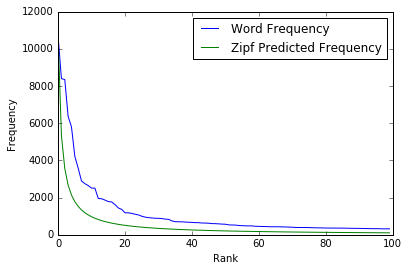

In [11]:
# Find 100 most frequent words
words_freq = nltk.FreqDist(words_lower)
top100_words = words_freq.most_common()[:100]

# Get values for expected frequency of top 100 words using Zipf's Law
max_freq = top100_words[0][1]
counter = 1
zipf = []
while len(zipf) < 100:
    zipf.append(max_freq/counter)
    counter += 1

# Plot actual frequencies and Zipf frequencies
plot([b for (a,b) in top100_words], label = 'Word Frequency') # Blue
plot(zipf, label = 'Zipf Predicted Frequency') # Green
legend(loc='best')
xlabel('Rank')
ylabel('Frequency')

## Top 10 Words after Stemming and Removing Stop Words

In [12]:
# Remove stop words
from nltk.corpus import stopwords
no_stops_words = [word for word in words_lower if word not in stopwords.words('english')]

In [13]:
from nltk.stem.porter import PorterStemmer
PS = PorterStemmer()

# Perform stemming on words
stem_words = []
for word in no_stops_words:
    stem_word = PS.stem(word)
    stem_words.append(stem_word)

In [14]:
# Find 10 most frequent words
words_freq_no_stops = nltk.FreqDist(stem_words)
top10_words = words_freq_no_stops.most_common()[:10]

top10_words

[(u'work', 2234),
 (u'manag', 1887),
 (u'experi', 1806),
 (u'develop', 1562),
 (u'client', 1276),
 (u'role', 1241),
 (u'team', 1237),
 (u'busi', 1179),
 (u'requir', 1122),
 (u'skill', 1064)]

Due to the size of the data set, we chose to use stemming rather than lemmatization. This resulted in a list of the top 10 word stems rather than words themselves or lemmas. However, given the context, the lemmas for each stem can be estimated. 

The 10 most frequent word stems with their likely associated lemmas are listed below, along with their respective frequencies:
1. 'work' (work) - 2141
2. 'manag' (manage) - 2049
3. 'experi'(experience) - 1642
4. 'role' (role) - 1246
5. 'team' (team) - 1226
6. 'busi' (business) - 1213
7. 'client' (client) - 1206
8. 'develop' (develop) - 1150
9. 'requir' (require) - 1018
10. 'servic' (service) - 1017

# Part B (Salary Prediction)

In [52]:
#Create new classifier for job posting salaries in the top quartile
sal_75 = train_sample['SalaryNormalized'].quantile(.75)

train_sample['salary_class'] = np.where(train_sample['SalaryNormalized']>=sal_75,'high','low')

train_sample.head()

,index,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,salary_class
0,46285,68562718,Doctor : SHO in A&E ****HCLaga****,"HCL Permanent, the UK`s leading permanent heal...",Essex,Essex,NaN,permanent,NaN,Healthcare & Nursing Jobs,29705 - 46708. Frequency: Annually,38206,jobs4medical.co.uk,low
1,176223,71468209,I'm looking for job as babysitter,I am 21 years old coming from Czech Republic a...,Feltham,Feltham,NaN,NaN,NaN,Domestic help & Cleaning Jobs,8 per Hour,15360,findababysitter.com,low
2,164045,71231249,Draftsman,"This position is to provide details, designs a...",Midlands,East Midlands,NaN,permanent,Michael Page International PLC,Engineering Jobs,20000 to 25000,22500,justengineers.net,low
3,47751,68580454,Depot Manager,circa **** car 10% bonus Has overall respons...,"Greater London, North London",London,NaN,NaN,New Century Recruitment,Other/General Jobs,"50,000-74,999 yearly",62499,theladders.co.uk,high
4,100493,69540418,Lettings and Sales Negotiators,Lettings & Sales NegotiatorsNorth West London ...,"North West London, South East",London,NaN,permanent,Liquid,Sales Jobs,25000 - 35000/annum OTE,30000,cv-library.co.uk,low


In [53]:
#Create two separate lists for text and salary classifier for each job posting
descriptions = []
pay_class = []

for index, value in train_sample.iterrows():
    descriptions.append(value['FullDescription'])
    pay_class.append(value['salary_class'])

In [54]:
#Split data into test/training set
trainset_size = int(round(len(train_sample)*0.75))

X_train = np.array([''.join(el) for el in descriptions[0:trainset_size]])
y_train = np.array([el for el in pay_class[0:trainset_size]])

X_test = np.array([''.join(el) for el in descriptions[trainset_size+1:len(descriptions)]]) 
y_test = np.array([el for el in pay_class[trainset_size+1:len(pay_class)]]) 

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Create TF IDF Matrix
vectorizer = TfidfVectorizer(min_df=2, 
 ngram_range=(1, 1), 
 stop_words='english', 
 strip_accents='unicode', 
 norm='l2')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [56]:
from sklearn.naive_bayes import MultinomialNB

#Run Naive Bayes Classifier
nb_classifier = MultinomialNB().fit(X_train, y_train)

y_nb_predicted = nb_classifier.predict(X_test)

In [28]:
y_nb_predicted

array(['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low',

In [57]:
from sklearn import metrics
print 'Precision:' + str(metrics.precision_score(y_test, y_nb_predicted, average = 'micro', pos_label=None))
print 'Recall: ' + str(metrics.recall_score(y_test, y_nb_predicted, average = 'micro', pos_label=None))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, y_nb_predicted))

Precision:0.826896537931
Recall: 0.826896537931
Accuracy: 0.826896537931


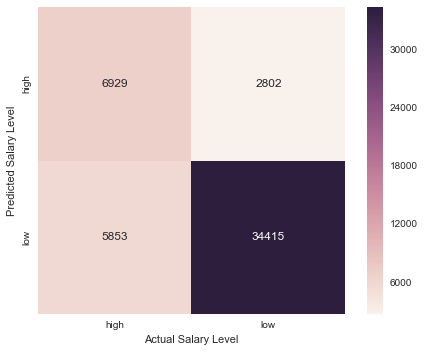

In [58]:
#Fancy boy confusion matrix
import seaborn as sns; sns.set()

mat = metrics.confusion_matrix(y_test, y_nb_predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=unique(pay_class), yticklabels=unique(pay_class))
plt.xlabel('Actual Salary Level')
plt.ylabel('Predicted Salary Level');

### Top 10 Words Most Indicative of High/Low Salary

In [59]:
def most_informative_features(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print class_labels[0], coef, feat

    print

    for coef, feat in reversed(topn_class2):
        print class_labels[1], coef, feat

In [60]:
most_informative_features(vectorizer, nb_classifier)

high -13.7957145656 000micro
high -13.7957145656 0032010
high -13.7957145656 00525
high -13.7957145656 0207
high -13.7957145656 03feb13
high -13.7957145656 04feb13
high -13.7957145656 050m
high -13.7957145656 0541
high -13.7957145656 05feb13
high -13.7957145656 078272

low -5.58397103476 sales
low -5.62403393158 experience
low -5.79009682382 work
low -5.79832769556 role
low -5.88959985797 team
low -5.9081126489 business
low -5.93690969448 skills
low -5.94609552272 working
low -6.00705863679 manager
low -6.035527465 client
